In [55]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import Chem
import numpy as np


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec


In [57]:
m1 = Chem.MolFromSmiles('CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC')
m2 = Chem.MolFromSmiles('CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2')
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024, useFeatures=True)
# dir(fp1)
# print(fp1.ToList())
# print(fp2.ToList())

# sum(np.array(fp1.ToList()) - np.array(fp2.ToList()))

In [58]:
df = pd.read_csv("basic_data.csv")
df.head()
df.columns

Index(['cid', 'smiles', 'action', 'action_gen'], dtype='object')

In [59]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

morgan_FP = []

for mol in df['mol']:
    fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024, useFeatures=True)
    morgan_FP.append(fp1.ToList())

df_morgan_FP = pd.DataFrame(morgan_FP)
df_morgan_FP

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
167,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
168,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
169,1,1,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [60]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import rand_score
from sklearn.metrics import f1_score

c:\Users\Public\anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Public\anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


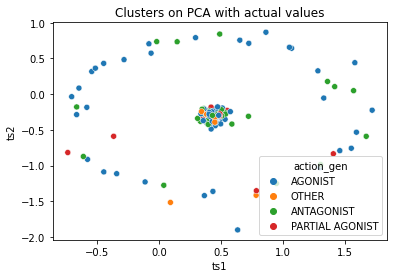

In [61]:
# scaler = StandardScaler()
# df_morgan_FP_scaled = scaler.fit_transform(df_morgan_FP)

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_morgan_FP)

tsne_results = pd.DataFrame(tsne_results, columns=['ts1', 'ts2'])
sns.scatterplot(x='ts1', y="ts2", hue=df['action_gen'], data=tsne_results)
plt.title('Clusters on PCA with actual values')
plt.show()

In [62]:
clustering_kmeans = KMeans(n_clusters=4)
df_morgan_FP['clusters'] = clustering_kmeans.fit_predict(df_morgan_FP)
df_morgan_FP['clusters'].value_counts()



c:\Users\Public\anaconda3\envs\m2vec\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


0    171
Name: clusters, dtype: int64

In [63]:
df_morgan_FP['action_gen'] = df['action_gen']
print('pairing_score: ', rand_score(df_morgan_FP.action_gen, df_morgan_FP.clusters))

pairing_score:  0.46590987272101825
